In [208]:
# Importing all necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Loading the CSV file into a DataFrame
df = pd.read_csv("winequalityN.csv")
print(df)


       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

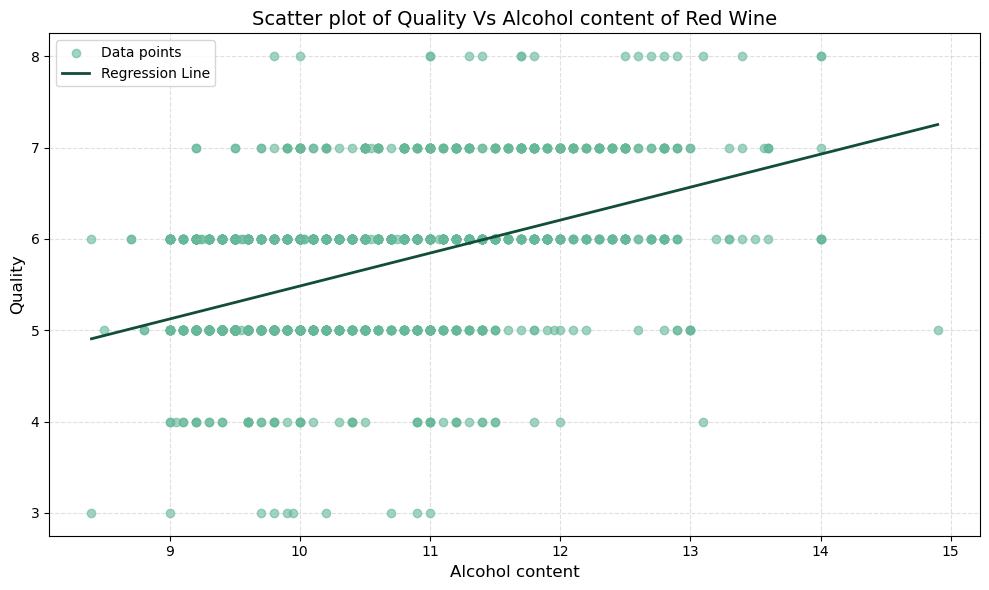

In [210]:
# Filtering out the red wine data
red_wine = df[df['type'] == 'red']


# Selecting the columns and filling in null values with mean
Qualities = ['quality', 'alcohol']

for Quality in Qualities:
    red_wine.loc[:, Quality] = red_wine[Quality].fillna(red_wine[Quality].mean())


# Defining the variables x and y
x = red_wine['alcohol'].values.reshape(-1, 1)
y = red_wine['quality'].values


# Function to create scatter plot
def scatter_plot(x, y):
    """
    Creates scatter plot between alcohol content and quality of red wine.
    """
    # Linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Generating points for regression
    x_values = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_values = model.predict(x_values)

    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='#63b998', alpha=0.6, label='Data points')
    plt.plot(x_values, y_values, color='#124d37', linewidth=2, label='Regression Line')
    plt.xlabel('Alcohol content', fontsize=12)
    plt.ylabel('Quality', fontsize=12)
    plt.title('Scatter plot of Quality Vs Alcohol content of Red Wine', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.4, linestyle='dashed')
    plt.tight_layout()
    plt.show()


# Calling the scatter_plot function with x and y
scatter_plot(x, y)

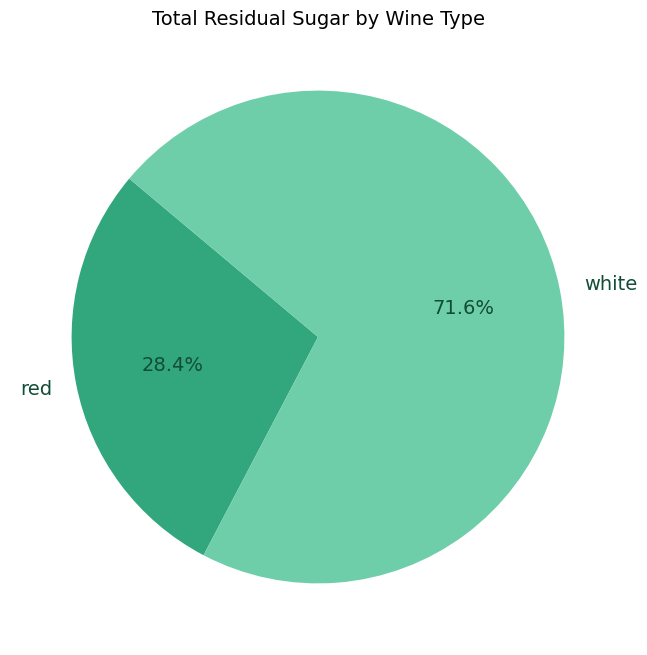

In [212]:
# Grouping the data by wine type and calculating the residual sugar
grouped_df = df.groupby('type')['residual sugar'].mean()


# Function to create pie chart
def pie_chart(grouped_df):
    """
    Creates pie chart using the mean residual sugar content of red and white wine.
    """
    colors = ['#32a77e', '#6ecea9']
    plt.figure(figsize=(10, 8))
    plt.pie(grouped_df, labels=grouped_df.index, colors=colors, autopct='%1.1f%%', startangle=140,
            labeldistance=1.1, textprops={'fontsize': 14, 'color': '#124d37'})
    plt.title('Total Residual Sugar by Wine Type', fontsize=14, pad=3)
    plt.show()


# Calling the function
pie_chart(grouped_df)


Mean: 10.49
Median: 10.30
Standard Deviation: 1.19
Skewness: 0.57
Kurtosis: -0.53


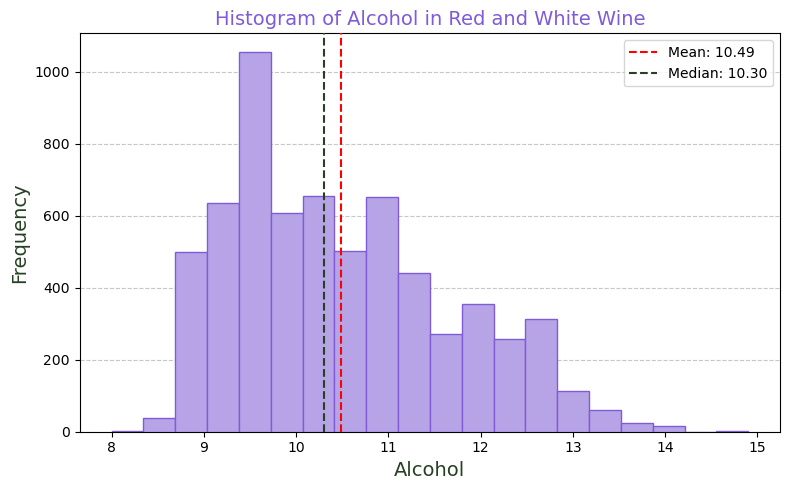

In [213]:
# Function to create histogram plot
def histogram_plot(df, column, bins=20, color='blue', edgecolor='black'):
    """
    Plots a histogram of Alcohol in the dataset with annotations for mean, median, skewness, and kurtosis.
    """
    # Extract the column data
    df_new = df[column].dropna()

    # Compute statistics
    statistics = df_new.describe()
    mean = statistics['mean']
    median = df_new.median()
    std = statistics['std']
    skewness = df_new.skew()
    kurtosis = df_new.kurtosis()

    # Print statistics
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Standard Deviation: {std:.2f}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")

    # Create the histogram
    plt.figure(figsize=(8, 5))
    plt.hist(df_new, bins=bins, color='#b7a4e6', edgecolor='#7f5bd8', zorder=3)

    # Add the vertical lines for mean and median
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}', zorder=4)
    plt.axvline(median, color='#274023', linestyle='dashed', linewidth=1.5, label=f'Median: {median:.2f}', zorder=4)

    # Set grid below the histogram
    plt.grid(axis='y', zorder=0, linestyle='dashed', alpha=0.7)

    # Add labels and title
    plt.xlabel('Alcohol', fontsize=14, color='#274023')
    plt.ylabel('Frequency', fontsize=14, color='#274023')
    plt.title(f'Histogram of Alcohol in Red and White Wine', fontsize=14, color='#7f5bd8')
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


# Example usage: plotting the histogram for 'alcohol' column
histogram_plot(df, 'alcohol')


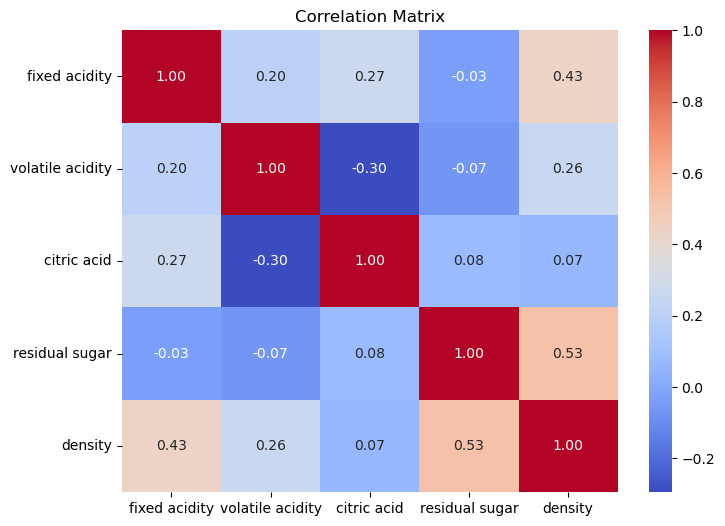

In [222]:
# Function to create heat map correlation
def heat_map_correlation(df, features, method='spearman'):
    """
    Plots the correlation matrix of the dataframe.
    """
    # Select specified numerical features
    numeric_features = df[features]

    # Calculate correlation matrix
    correlation_matrix = numeric_features.corr(method=method)

    # Creating a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()


# Selected features for the heat map
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'density']

# Calling the function to create heat map
heat_map_correlation(df, selected_features, method='spearman')


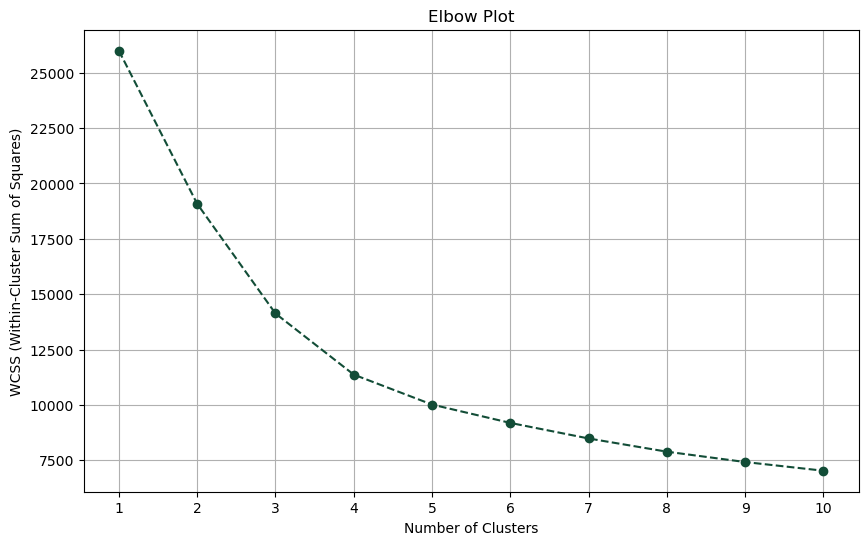

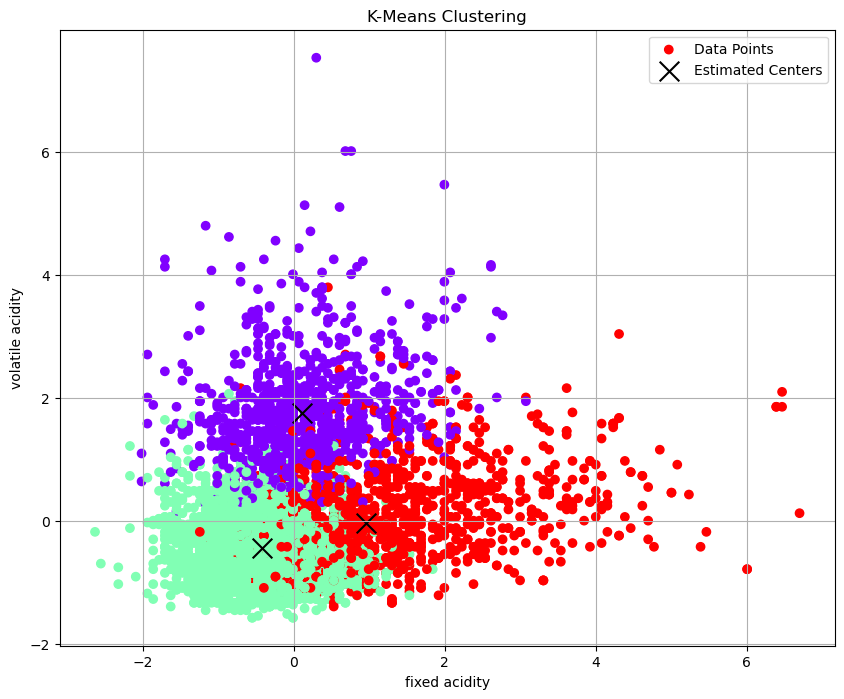

In [218]:
# Function to load and preprocess wine data
def load_and_preprocess_wine_data(df):
    """
    Loads the wine dataset, selects relevant features, handles missing values, and normalizes the data.
    """
    # Features to use
    qualities_used = ['fixed acidity', 'volatile acidity', 'citric acid', 'density']
    df_selected = df[qualities_used]

    # Replacing missing values with the mean of the column
    df_selected = df_selected.fillna(df_selected.mean())

    # Standardizing the features
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df_selected)

    return normalized_data, df_selected


# Function to plot elbow graph
def plot_elbow(data):
    """
    Plots the elbow graph from WCSS values.
    """
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='#124d37')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.title('Elbow Plot')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()


# Function for K-Means clustering
def k_means_clustering(data, n_clusters):
    """
    Performs K-Means clustering with the specified number of clusters.
    """
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    return kmeans, labels, centers


# Function to visualize K-Means clusters
def k_means_clusters_plot(data, labels, centers, feature_df):
    """
    Visualizes the K-Means clustering results.
    """
    plt.figure(figsize=(10, 8))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', label='Data Points')
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, c='black', label='Estimated Centers')
    plt.xlabel(feature_df.columns[0])  # Use the first feature's name for the x-axis label
    plt.ylabel(feature_df.columns[1])  # Use the second feature's name for the y-axis label
    plt.title('K-Means Clustering')
    plt.legend()
    plt.grid(True)
    plt.show()


# Normalising data
normalised_data, df_selected = load_and_preprocess_wine_data(df)

# Call elbow plot function to find the optimal number of clusters
plot_elbow(normalized_data)

# Set the number of clusters and perform K-Means clustering
n_clusters = 3
kmeans, labels, centers = k_means_clustering(normalised_data, n_clusters)

# Show the clusters
k_means_clusters_plot(normalised_data, labels, centers, df_selected)